### Podstawy przetwarzania dużych zbiorów danych - poziom 2 misje podstawowe
#### Paulina Szczepaniak 247798
#### Jan Gluźniewicz 247665

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.ticker as ticker
import seaborn as sns

In [129]:
df = pd.read_csv('df_merged_world_countries.csv')
df

,country_name,location_key,country_code,population,gdp_usd,area_sq_km,date,new_confirmed,cumulative_confirmed,new_deceased,...,area_sq_km_2,density_sq_km,growth_rate,world_population_percentage,gdp_in_1995,gdp_in_2000,gdp_in_2005,gdp_in_2010,gdp_in_2015,gdp_in_2016
0,Australia,AU,AUS,25499881,1.392681e+12,7741220,2022-01-18,72860.0,1836671.0,78.0,...,7692024,3.4032,1.0099,0.33,3.683917e+11,4.154462e+11,6.937641e+11,1.142877e+12,1.345383e+12,1.204616e+12
1,South Africa,ZA,ZAF,59308690,3.514316e+11,1219090,2022-01-02,3076.0,3475512.0,84.0,...,1221037,49.0517,1.0084,0.75,1.554603e+11,1.363619e+11,2.576714e+11,3.752981e+11,3.176107e+11,2.954562e+11
2,Peru,PE,PER,29381884,2.268481e+11,1285220,2021-03-30,10539.0,1577076.0,748.0,...,1285216,26.4933,1.0099,0.43,5.331279e+10,5.174475e+10,7.606061e+10,1.475289e+11,1.892121e+11,1.922073e+11
3,United States of America,US,USA,331002647,2.137442e+13,9831510,2021-09-08,167791.0,39489769.0,2068.0,...,9372610,36.0935,1.0038,4.24,7.664060e+12,1.028478e+13,1.309373e+13,1.496437e+13,1.812071e+13,1.862448e+13
4,Ethiopia,ET,ETH,114963583,9.610766e+10,1104300,2021-11-10,459.0,368106.0,22.0,...,1104300,111.7268,1.0257,1.55,7.663985e+09,8.242392e+09,1.240114e+10,2.993379e+10,6.446455e+10,7.237422e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227925,Croatia,HR,HRV,4076246,6.091759e+10,56590,2022-08-28,59.0,1211979.0,15.0,...,56594,71.2153,0.9927,0.05,2.238756e+10,2.177427e+10,4.541636e+10,5.966543e+10,4.892188e+10,5.071496e+10
227926,Austria,AT,AUT,8858775,4.551400e+11,83879,2022-07-27,9019.0,4756351.0,15.0,...,83871,106.5877,1.0020,0.11,2.410383e+11,1.967998e+11,3.159744e+11,3.918927e+11,3.820659e+11,3.908000e+11
227927,Argentina,AR,ARG,44938712,4.496634e+11,2780400,2021-10-10,382.0,5289547.0,15.0,...,2780400,16.3683,1.0052,0.57,2.580318e+11,2.842038e+11,1.987371e+11,4.236274e+11,5.847115e+11,5.454761e+11
227928,Sweden,SE,SWE,10230185,5.560253e+11,447430,2021-03-16,6786.0,731890.0,15.0,...,450295,23.4276,1.0079,0.13,2.640520e+11,2.598020e+11,3.890423e+11,4.883777e+11,4.979181e+11,5.144600e+11


In [130]:
df['date'] = pd.to_datetime(df['date'])

### Część 1:

##### Analiza zmian zjawisk w czasie porządkuje informacje i pozwala na wyciągnięcie bardziej szczegółowych wniosków, np. trendów ze składowymi okresowymi.

##### Trend to tendencja rozwojowa, która wskazuje ogólny kierunek rozwoju zjawiska. Rozwój zjawiska rozumiany jest jako systematyczne zmiany, jakim podlega to zjawisko. Rozróżniany jest m.in. trend liniowy i nieliniowy.

##### Składowe okresowe to regularne odchylenia od trendu. Wahania cykliczne charakteryzują się długookresowymi, rytmicznymi odchyleniami. Wahania sezonowe są krótkookresowe i odzwierciedlają wpływ zachowań wynikający z kalendarza. 

##### Wyznacz średnią kroczącą i odchylenie standardowe kroczące (np. 7-dniowe), aby zobaczyć, jak te zjawiska zmieniają się w czasie. Obliczenia wykonaj dla:


In [131]:
print(df.columns)

Index(['country_name', 'location_key', 'country_code', 'population', 'gdp_usd',
       'area_sq_km', 'date', 'new_confirmed', 'cumulative_confirmed',
       'new_deceased', 'cumulative_deceased', 'new_persons_vaccinated',
       'cumulative_persons_vaccinated', 'new_tested', 'cumulative_tested',
       'rank', 'country_territory_name', 'capital', 'continent',
       '2022_population', '2020_population', '2015_population',
       '2010_population', '2000_population', '1990_population',
       '1980_population', '1970_population', 'area_sq_km_2', 'density_sq_km',
       'growth_rate', 'world_population_percentage', 'gdp_in_1995',
       'gdp_in_2000', 'gdp_in_2005', 'gdp_in_2010', 'gdp_in_2015',
       'gdp_in_2016'],
      dtype='object')


##### 1.1. liczby nowych zachorowań,

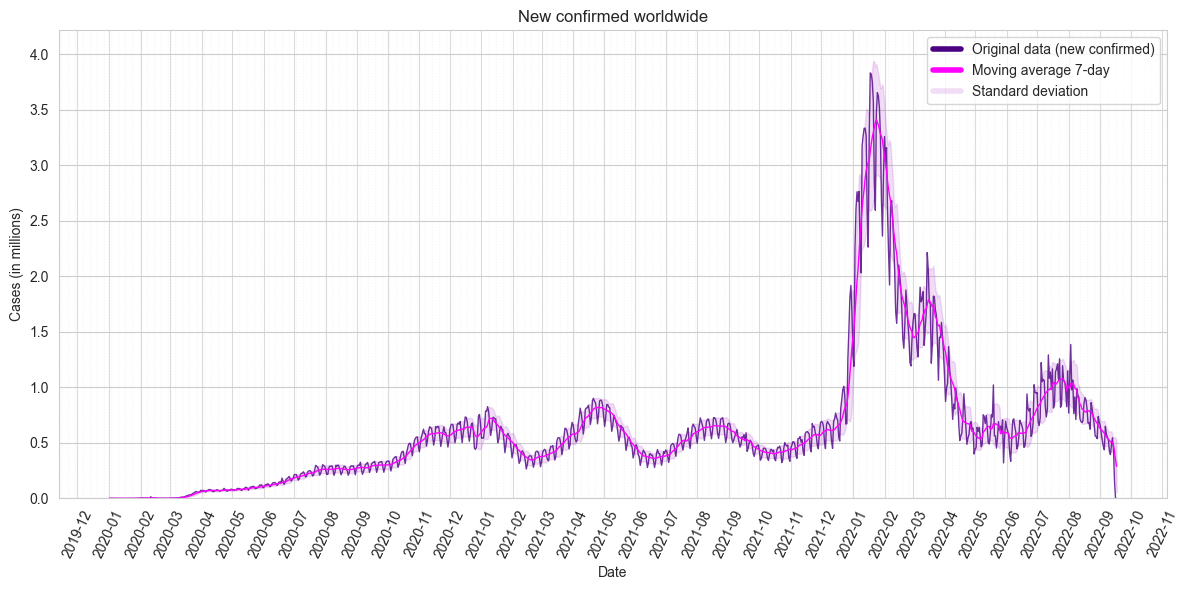

In [171]:
window = 7

# Obliczanie rolling mean i std dla globalnych danych (sumujemy przypadki globalne)
df['new_confirmed_rolling_mean'] = df.groupby('country_name')['new_confirmed'].transform(
    lambda x: x.rolling(window=window, min_periods=1).mean())
df['new_confirmed_rolling_std'] = df.groupby('country_name')['new_confirmed'].transform(
    lambda x: x.rolling(window=window, min_periods=1).std())

# Grupowanie danych dla całego świata (sumowanie przypadków globalnych na każdą datę)
world_data = df.groupby('date')['new_confirmed'].sum().reset_index()

# Obliczanie średniej ruchomej i odchylenia standardowego dla danych światowych
world_data['new_confirmed_rolling_mean'] = world_data['new_confirmed'].rolling(window=window, min_periods=1).mean()
world_data['new_confirmed_rolling_std'] = world_data['new_confirmed'].rolling(window=window, min_periods=1).std()

# Konwersja danych na miliony
world_data['new_confirmed_millions'] = world_data['new_confirmed'] / 1000000
world_data['new_confirmed_rolling_mean_millions'] = world_data['new_confirmed_rolling_mean'] / 1000000
world_data['new_confirmed_rolling_std_millions'] = world_data['new_confirmed_rolling_std'] / 1000000

# Filtrowanie danych (tworzymy wykres dla całego świata)
plt.figure(figsize=(12, 6))

# Linie z danymi oryginalnymi oraz średnią ruchomą
plt.plot(world_data['date'], world_data['new_confirmed_millions'], 
         label='Original data (new confirmed)', color='indigo', alpha=0.8, linewidth=1)
plt.plot(world_data['date'], world_data['new_confirmed_rolling_mean_millions'], 
         label=f'Moving average {window}-day', color='magenta', alpha=1, linewidth=1)

# Obszar wypełniony pomiędzy średnią a odchyleniem standardowym
plt.fill_between(world_data['date'], 
                 world_data['new_confirmed_rolling_mean_millions'] - world_data['new_confirmed_rolling_std_millions'],
                 world_data['new_confirmed_rolling_mean_millions'] + world_data['new_confirmed_rolling_std_millions'],
                 color='mediumorchid', alpha=0.2, label='Standard deviation')

# Tworzenie legendy tylko z kolorami
plt.legend(handles=[
    mlines.Line2D([], [], color='indigo', lw=4, label='Original data (new confirmed)'),
    mlines.Line2D([], [], color='magenta', lw=4, label=f'Moving average {window}-day'),
    mlines.Line2D([], [], color='mediumorchid', alpha=0.2, lw=4, label='Standard deviation')
])

# Tytuł wykresu i etykiety
plt.title(f'New confirmed worldwide')
plt.xlabel('Date')
plt.ylabel('Cases (in millions)')

# Formatowanie osi X (daty)
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.grid(True, which='major', axis='x', linestyle='-', alpha=0.7)
ax.grid(True, which='minor', axis='x', linestyle=':', alpha=0.2)

# Ustawienie zakresu osi Y, aby był bardziej dostosowany do danych
ax.set_ylim(0, world_data['new_confirmed_millions'].max() * 1.1)

plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

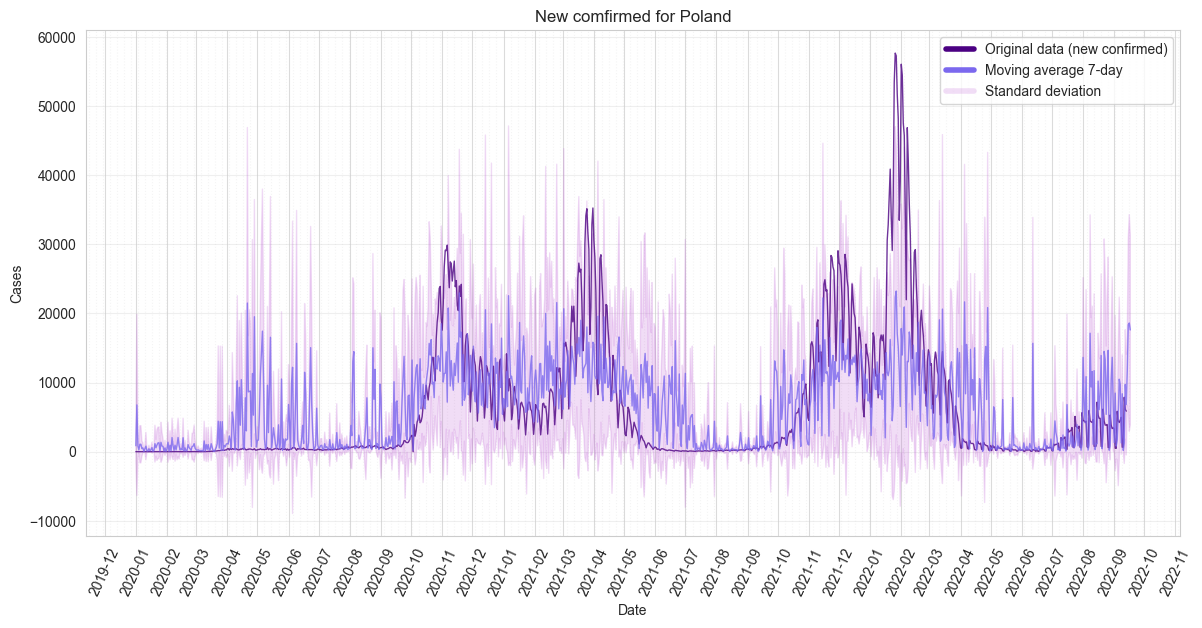

In [149]:
window = 7
df['new_confirmed_rolling_mean'] = df.groupby('country_name')['new_confirmed'].transform(
    lambda x: x.rolling(window=window, min_periods=1).mean())
df['new_confirmed_rolling_std'] = df.groupby('country_name')['new_confirmed'].transform(
    lambda x: x.rolling(window=window, min_periods=1).std())

selected_country = 'Poland'  # Zmień na dowolny kraj z twojego DataFrame

country_data = df[df['country_name'] == selected_country].copy()
country_data = country_data.sort_values('date')

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
plt.plot(country_data['date'], country_data['new_confirmed'], 
         label='Original data (new confirmed)', color='indigo', alpha=0.8, linewidth=1)
plt.plot(country_data['date'], country_data['new_confirmed_rolling_mean'], 
         label=f'Moving average {window}-day', color='mediumslateblue', alpha=0.8, linewidth=1)
plt.fill_between(country_data['date'], 
                 country_data['new_confirmed_rolling_mean'] - country_data['new_confirmed_rolling_std'],
                 country_data['new_confirmed_rolling_mean'] + country_data['new_confirmed_rolling_std'],
                 color='mediumorchid', alpha=0.2, label='Standard deviation')

# Tworzenie legendy tylko z kolorami
plt.legend(handles=[
    mlines.Line2D([], [], color='indigo', lw=4, label='Original data (new confirmed)'),
    mlines.Line2D([], [], color='mediumslateblue', lw=4, label=f'Moving average {window}-day'),
    mlines.Line2D([], [], color='mediumorchid', alpha=0.2, lw=4, label='Standard deviation')
])

plt.title(f'New comfirmed for {selected_country}')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.grid(True, alpha=0.3)
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.grid(True, which='major', axis='x', linestyle='-', alpha=0.7)
ax.grid(True, which='minor', axis='x', linestyle=':', alpha=0.2)
plt.xticks(rotation=65)
plt.show()

##### 1.2. liczby nowych śmierci,

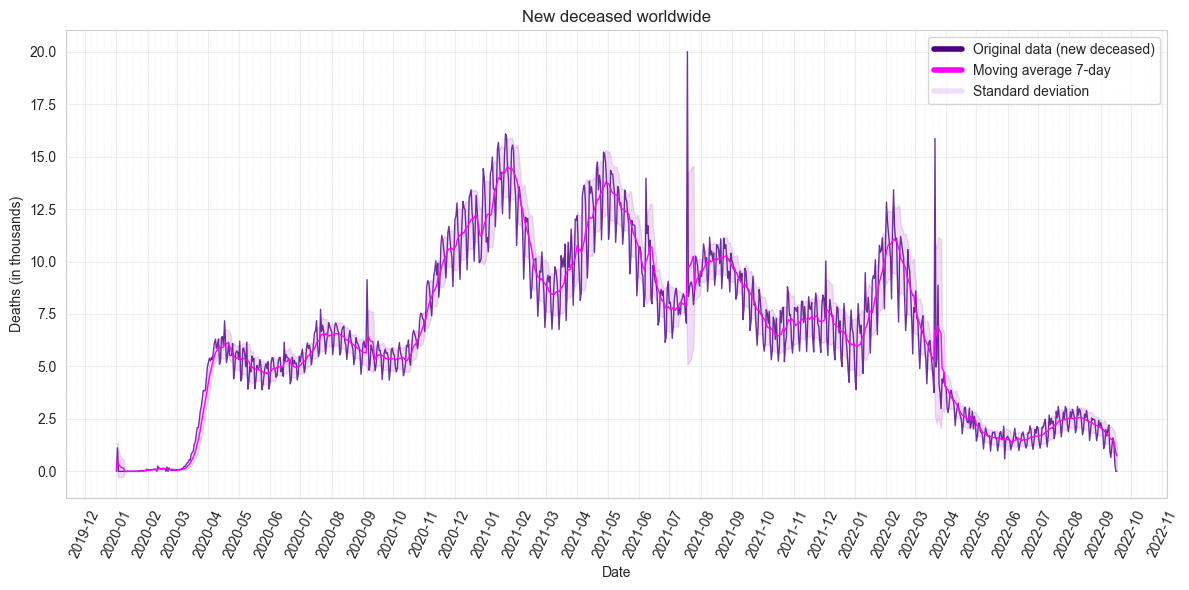

In [170]:
window = 7

# Grupowanie po dacie i sumowanie liczby zgonów na świecie
world_data = df.groupby('date')['new_deceased'].sum().reset_index()

# Obliczanie rolling mean i std dla zsumowanych danych globalnych
world_data['new_deceased_rolling_mean'] = world_data['new_deceased'].rolling(window=window, min_periods=1).mean()
world_data['new_deceased_rolling_std'] = world_data['new_deceased'].rolling(window=window, min_periods=1).std()

# Konwersja danych na tysiące
world_data['new_deceased_thousands'] = world_data['new_deceased'] / 1000
world_data['new_deceased_rolling_mean_thousands'] = world_data['new_deceased_rolling_mean'] / 1000
world_data['new_deceased_rolling_std_thousands'] = world_data['new_deceased_rolling_std'] / 1000

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Linie z danymi oryginalnymi oraz średnią ruchomą
plt.plot(world_data['date'], world_data['new_deceased_thousands'], 
         label='Original data (new deceased)', color='indigo', alpha=0.8, linewidth=1)
plt.plot(world_data['date'], world_data['new_deceased_rolling_mean_thousands'], 
         label=f'Moving average {window}-day', color='magenta', alpha=1, linewidth=1)

# Obszar wypełniony pomiędzy średnią a odchyleniem standardowym
plt.fill_between(world_data['date'], 
                 world_data['new_deceased_rolling_mean_thousands'] - world_data['new_deceased_rolling_std_thousands'],
                 world_data['new_deceased_rolling_mean_thousands'] + world_data['new_deceased_rolling_std_thousands'],
                 color='mediumorchid', alpha=0.2, label='Standard deviation')

# Tworzenie legendy tylko z kolorami
plt.legend(handles=[
    mlines.Line2D([], [], color='indigo', lw=4, label='Original data (new deceased)'),
    mlines.Line2D([], [], color='magenta', lw=4, label=f'Moving average {window}-day'),
    mlines.Line2D([], [], color='mediumorchid', alpha=0.2, lw=4, label='Standard deviation')
])

# Tytuł i etykiety
plt.title(f'New deceased worldwide')
plt.xlabel('Date')
plt.ylabel('Deaths (in thousands)')

# Formatowanie osi x (daty)
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.grid(True, which='major', axis='x', linestyle='-', alpha=0.7)
ax.grid(True, which='minor', axis='x', linestyle=':', alpha=0.2)

plt.xticks(rotation=65)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

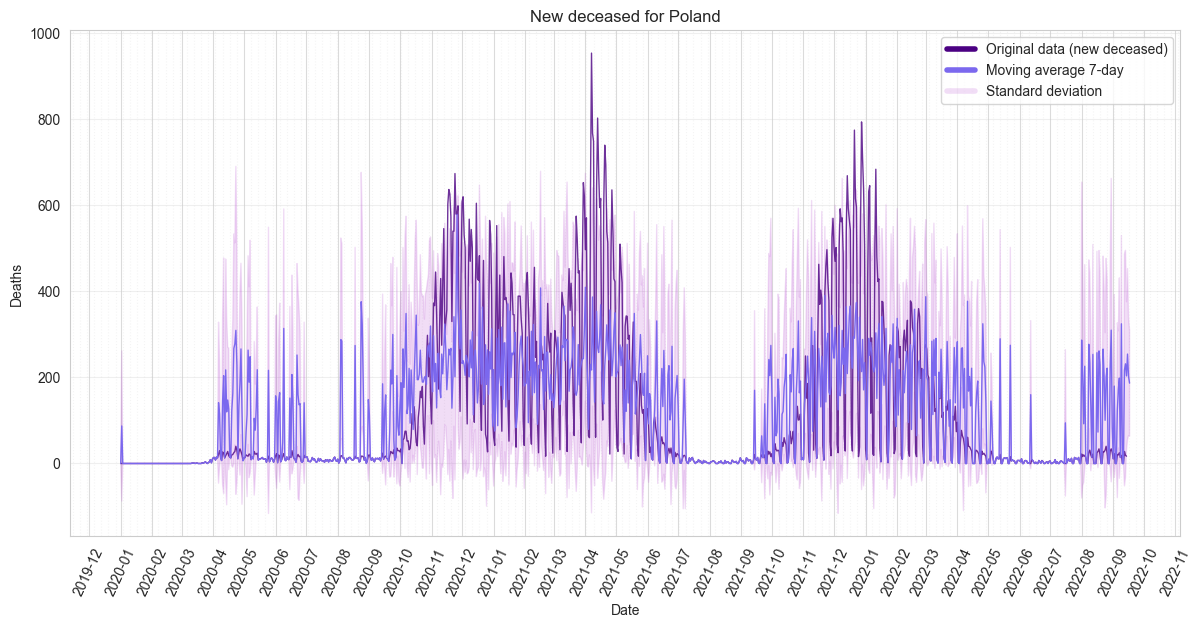

In [169]:
window = 7
df['new_deceased_rolling_mean'] = df.groupby('country_name')['new_deceased'].transform(
    lambda x: x.rolling(window=window, min_periods=1).mean())
df['new_deceased_rolling_std'] = df.groupby('country_name')['new_deceased'].transform(
    lambda x: x.rolling(window=window, min_periods=1).std())

selected_country = 'Poland'  # Zmień na dowolny kraj z twojego DataFrame

country_data = df[df['country_name'] == selected_country].copy()
country_data = country_data.sort_values('date')

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
line1, = plt.plot(country_data['date'], country_data['new_deceased'], 
                  label='Original data (new deceased)', color='indigo', alpha=0.8, linewidth=1)
line2, = plt.plot(country_data['date'], country_data['new_deceased_rolling_mean'], 
                  label=f'Moving average {window}-day', color='mediumslateblue', linewidth=1)
plt.fill_between(country_data['date'], 
                 country_data['new_deceased_rolling_mean'] - country_data['new_deceased_rolling_std'],
                 country_data['new_deceased_rolling_mean'] + country_data['new_deceased_rolling_std'],
                 color='mediumorchid', alpha=0.2, label='Standard deviation')

# Tworzenie legendy tylko z kolorami
plt.legend(handles=[
    mlines.Line2D([], [], color='indigo', lw=4, label='Original data (new deceased)'),
    mlines.Line2D([], [], color='mediumslateblue', lw=4, label=f'Moving average {window}-day'),
    mlines.Line2D([], [], color='mediumorchid', alpha=0.2, lw=4, label='Standard deviation')
])

plt.title(f'New deceased for {selected_country}')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.grid(True, alpha=0.3)
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.grid(True, which='major', axis='x', linestyle='-', alpha=0.7)
ax.grid(True, which='minor', axis='x', linestyle=':', alpha=0.2)

plt.xticks(rotation=65)
plt.show()

##### 1.3. liczby nowych szczepień,

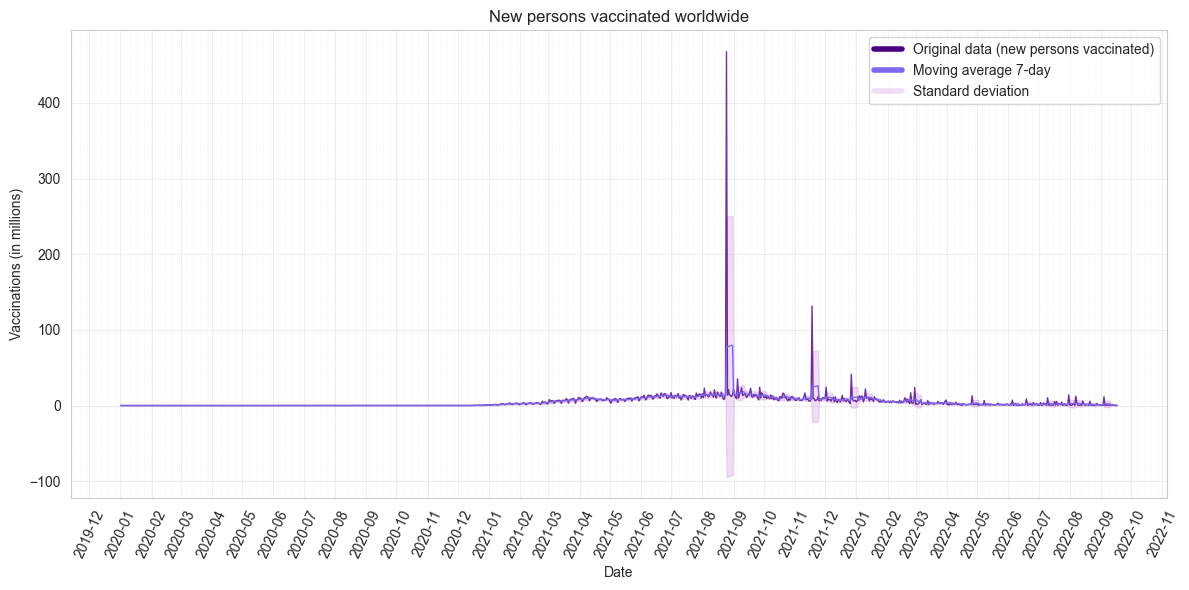

In [167]:
window = 7

# Sumowanie liczby nowo zaszczepionych osób dla całego świata (po dacie)
world_data = df.groupby('date')['new_persons_vaccinated'].sum().reset_index()

# Obliczanie rolling mean i std na sumarycznych danych
world_data['new_persons_vaccinated_rolling_mean'] = world_data['new_persons_vaccinated'].rolling(window=window, min_periods=1).mean()
world_data['new_persons_vaccinated_rolling_std'] = world_data['new_persons_vaccinated'].rolling(window=window, min_periods=1).std()

# Konwersja danych na miliony
world_data['new_persons_vaccinated_millions'] = world_data['new_persons_vaccinated'] / 1000000
world_data['new_persons_vaccinated_rolling_mean_millions'] = world_data['new_persons_vaccinated_rolling_mean'] / 1000000
world_data['new_persons_vaccinated_rolling_std_millions'] = world_data['new_persons_vaccinated_rolling_std'] / 1000000

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Linie z danymi oryginalnymi oraz średnią ruchomą
plt.plot(world_data['date'], world_data['new_persons_vaccinated_millions'], 
         label='Original data (new persons vaccinated)', color='indigo', alpha=0.8, linewidth=1)
plt.plot(world_data['date'], world_data['new_persons_vaccinated_rolling_mean_millions'], 
         label=f'Moving average {window}-day', color='mediumslateblue', linewidth=1)

# Obszar pomiędzy rolling mean ± std
plt.fill_between(world_data['date'], 
                 world_data['new_persons_vaccinated_rolling_mean_millions'] - world_data['new_persons_vaccinated_rolling_std_millions'],
                 world_data['new_persons_vaccinated_rolling_mean_millions'] + world_data['new_persons_vaccinated_rolling_std_millions'],
                 color='mediumorchid', alpha=0.2, label='Standard deviation')

# Legenda
plt.legend(handles=[
    mlines.Line2D([], [], color='indigo', lw=4, label='Original data (new persons vaccinated)'),
    mlines.Line2D([], [], color='mediumslateblue', lw=4, label=f'Moving average {window}-day'),
    mlines.Line2D([], [], color='mediumorchid', alpha=0.2, lw=4, label='Standard deviation')
])

# Tytuł i osie
plt.title('New persons vaccinated worldwide')
plt.xlabel('Date')
plt.ylabel('Vaccinations (in millions)')

# Formatowanie osi X
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.grid(True, which='major', axis='x', linestyle='-', alpha=0.7)
ax.grid(True, which='minor', axis='x', linestyle=':', alpha=0.2)

plt.xticks(rotation=65)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

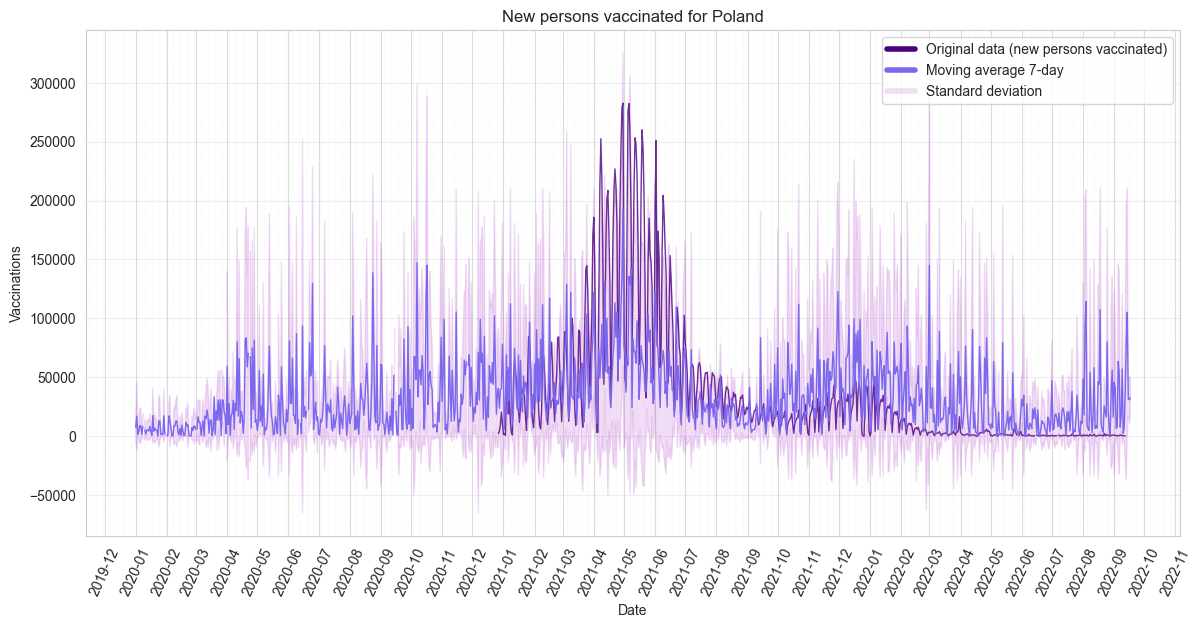

In [136]:
window = 7
df['new_persons_vaccinated_rolling_mean'] = df.groupby('country_name')['new_persons_vaccinated'].transform(
    lambda x: x.rolling(window=window, min_periods=1).mean())
df['new_persons_vaccinated_rolling_std'] = df.groupby('country_name')['new_persons_vaccinated'].transform(
    lambda x: x.rolling(window=window, min_periods=1).std())

selected_country = 'Poland'  # Zmień na dowolny kraj z twojego DataFrame

country_data = df[df['country_name'] == selected_country].copy()
country_data = country_data.sort_values('date')

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
line1, = plt.plot(country_data['date'], country_data['new_persons_vaccinated'], 
                  label='Original data (new persons vaccinated)', color='indigo', alpha=0.8, linewidth=1)
line2, = plt.plot(country_data['date'], country_data['new_persons_vaccinated_rolling_mean'], 
                  label=f'Moving average {window}-day', color='mediumslateblue', linewidth=1)
plt.fill_between(country_data['date'], 
                 country_data['new_persons_vaccinated_rolling_mean'] - country_data['new_persons_vaccinated_rolling_std'],
                 country_data['new_persons_vaccinated_rolling_mean'] + country_data['new_persons_vaccinated_rolling_std'],
                 color='mediumorchid', alpha=0.2, label='Standard deviation')

# Tworzenie legendy tylko z kolorami
plt.legend(handles=[
    mlines.Line2D([], [], color='indigo', lw=4, label='Original data (new persons vaccinated)'),
    mlines.Line2D([], [], color='mediumslateblue', lw=4, label=f'Moving average {window}-day'),
    mlines.Line2D([], [], color='mediumorchid', alpha=0.2, lw=4, label='Standard deviation')
])

plt.title(f'New persons vaccinated for {selected_country}')
plt.xlabel('Date')
plt.ylabel('Vaccinations')
plt.grid(True, alpha=0.3)
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.grid(True, which='major', axis='x', linestyle='-', alpha=0.7)
ax.grid(True, which='minor', axis='x', linestyle=':', alpha=0.2)

plt.xticks(rotation=65)
plt.show()

##### 1.4. 2 innych różnych informacji, które uznasz za istotne.

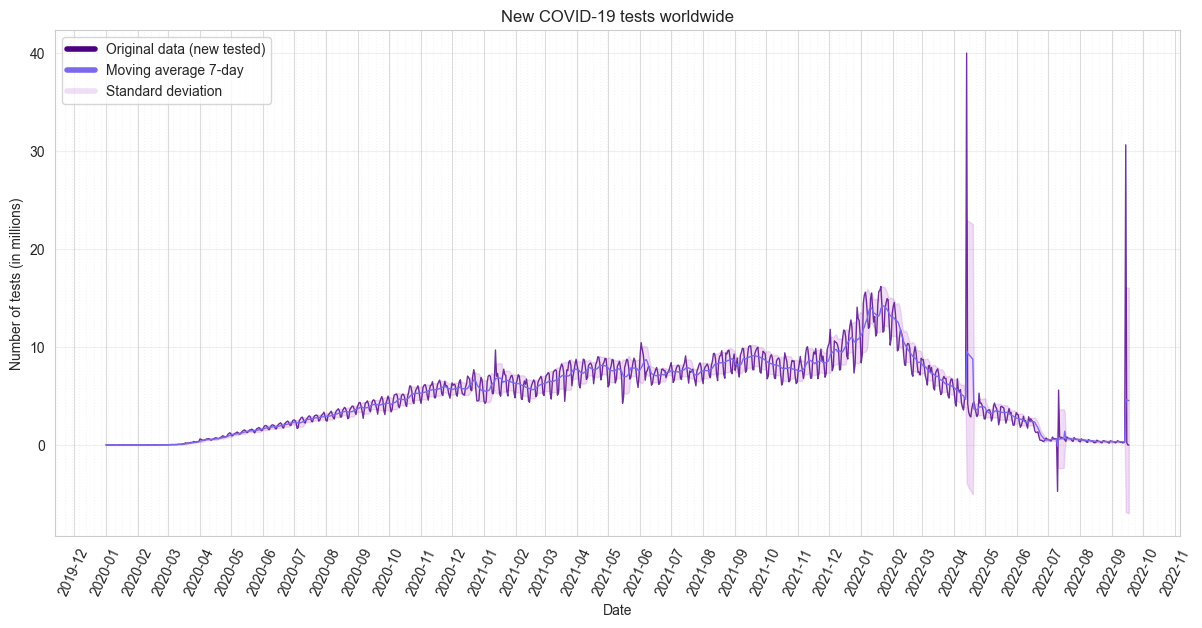

In [166]:
window = 7

# Grupowanie po dacie i sumowanie testów
world_data = df.groupby('date')['new_tested'].sum().reset_index()
world_data = world_data.sort_values('date')

# Obliczanie rolling mean i std
world_data['new_tested_rolling_mean'] = world_data['new_tested'].rolling(window=window, min_periods=1).mean()
world_data['new_tested_rolling_std'] = world_data['new_tested'].rolling(window=window, min_periods=1).std()

# Konwersja danych na miliony
world_data['new_tested_millions'] = world_data['new_tested'] / 1000000
world_data['new_tested_rolling_mean_millions'] = world_data['new_tested_rolling_mean'] / 1000000
world_data['new_tested_rolling_std_millions'] = world_data['new_tested_rolling_std'] / 1000000

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
plt.plot(world_data['date'], world_data['new_tested_millions'], 
         label='Original data (new tested)', color='indigo', alpha=0.8, linewidth=1)
plt.plot(world_data['date'], world_data['new_tested_rolling_mean_millions'], 
         label=f'Moving average {window}-day', color='mediumslateblue', linewidth=1)

# Obszar odchylenia standardowego
plt.fill_between(world_data['date'], 
                 world_data['new_tested_rolling_mean_millions'] - world_data['new_tested_rolling_std_millions'],
                 world_data['new_tested_rolling_mean_millions'] + world_data['new_tested_rolling_std_millions'],
                 color='mediumorchid', alpha=0.2, label='Standard deviation')

# Legenda z kolorami
plt.legend(handles=[
    mlines.Line2D([], [], color='indigo', lw=4, label='Original data (new tested)'),
    mlines.Line2D([], [], color='mediumslateblue', lw=4, label=f'Moving average {window}-day'),
    mlines.Line2D([], [], color='mediumorchid', alpha=0.2, lw=4, label='Standard deviation')
])

plt.title('New COVID-19 tests worldwide')
plt.xlabel('Date')
plt.ylabel('Number of tests (in millions)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Formatowanie osi X
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.grid(True, which='major', axis='x', linestyle='-', alpha=0.7)
ax.grid(True, which='minor', axis='x', linestyle=':', alpha=0.2)

plt.xticks(rotation=65)
plt.show()

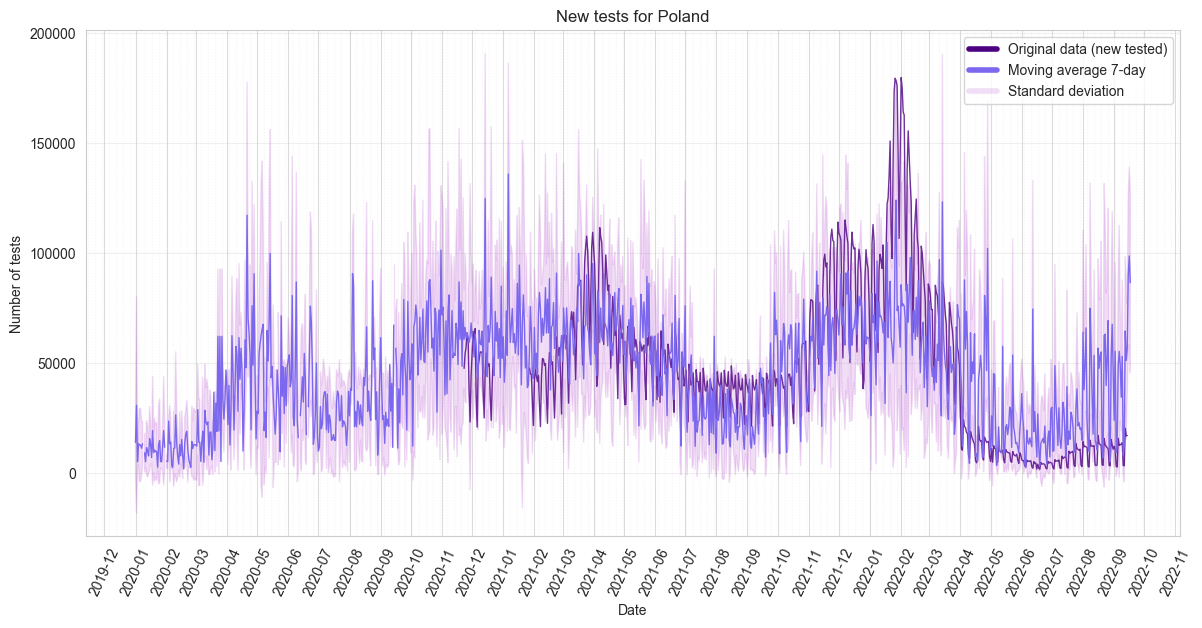

In [137]:
window = 7
df['new_tested_rolling_mean'] = df.groupby('country_name')['new_tested'].transform(
    lambda x: x.rolling(window=window, min_periods=1).mean())
df['new_tested_rolling_std'] = df.groupby('country_name')['new_tested'].transform(
    lambda x: x.rolling(window=window, min_periods=1).std())

selected_country = 'Poland'  # Zmień na dowolny kraj z twojego DataFrame

country_data = df[df['country_name'] == selected_country].copy()
country_data = country_data.sort_values('date')

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
line1, = plt.plot(country_data['date'], country_data['new_tested'], 
                  label='Original data (new tested)', color='indigo', alpha=0.8, linewidth=1)
line2, = plt.plot(country_data['date'], country_data['new_tested_rolling_mean'], 
                  label=f'Moving average {window}-day', color='mediumslateblue', linewidth=1)
plt.fill_between(country_data['date'], 
                 country_data['new_tested_rolling_mean'] - country_data['new_tested_rolling_std'],
                 country_data['new_tested_rolling_mean'] + country_data['new_tested_rolling_std'],
                 color='mediumorchid', alpha=0.2, label='Standard deviation')

# Tworzenie legendy tylko z kolorami
plt.legend(handles=[
    mlines.Line2D([], [], color='indigo', lw=4, label='Original data (new tested)'),
    mlines.Line2D([], [], color='mediumslateblue', lw=4, label=f'Moving average {window}-day'),
    mlines.Line2D([], [], color='mediumorchid', alpha=0.2, lw=4, label='Standard deviation')
])

plt.title(f'New tests for {selected_country}')
plt.xlabel('Date')
plt.ylabel('Number of tests')
plt.grid(True, alpha=0.3)
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.grid(True, which='major', axis='x', linestyle='-', alpha=0.7)
ax.grid(True, which='minor', axis='x', linestyle=':', alpha=0.2)

plt.xticks(rotation=65)
plt.show()


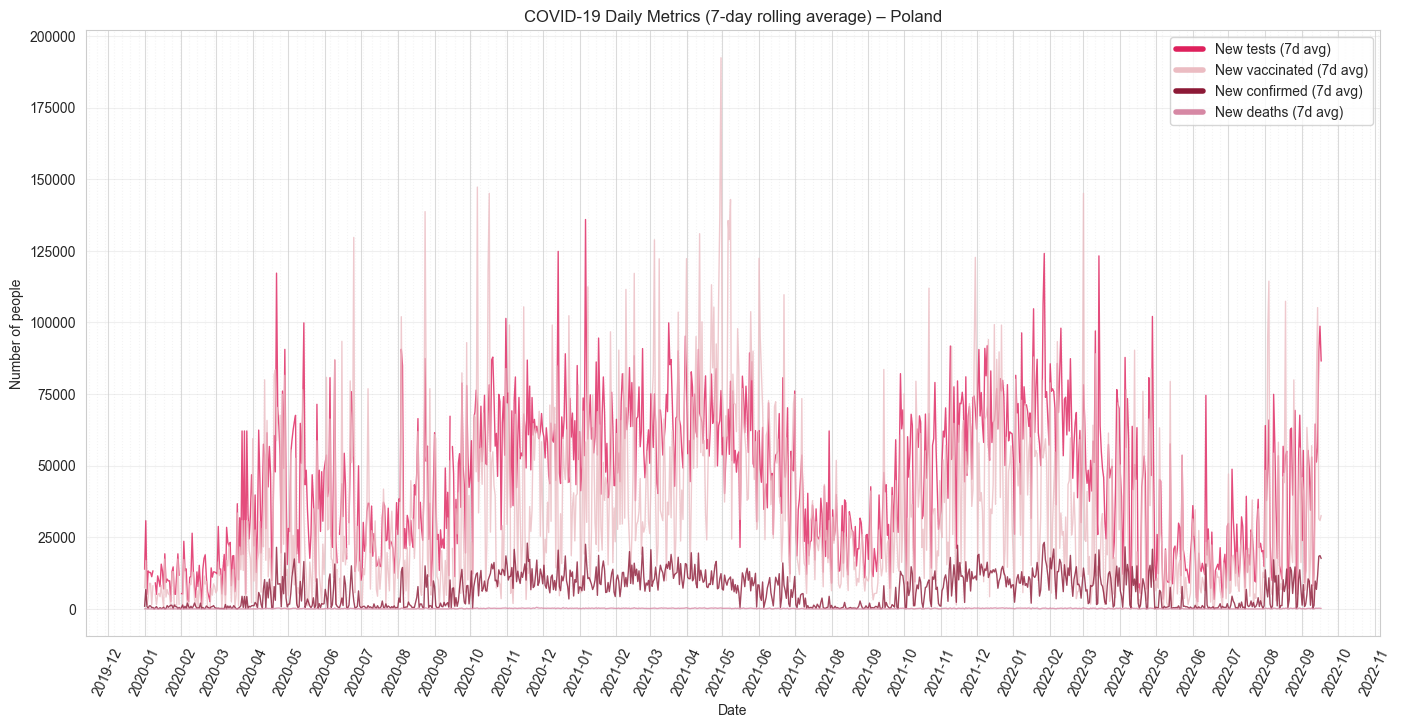

In [138]:
window = 7
selected_country = 'Poland'  # Zmień na inny kraj jeśli chcesz

# Oblicz rolling mean dla wszystkich 4 wskaźników
for col in ['new_tested', 'new_confirmed', 'new_deceased', 'new_persons_vaccinated']:
    df[f'{col}_rolling'] = df.groupby('country_name')[col].transform(
        lambda x: x.rolling(window=window, min_periods=1).mean())

# Filtrowanie i sortowanie danych dla wybranego kraju
country_data = df[df['country_name'] == selected_country].copy()
country_data = country_data.sort_values('date')

# Tworzenie wykresu
plt.figure(figsize=(14, 7))

# Ustawiamy linewidth=1 dla każdej linii w odpowiedniej kolejności
line1, = plt.plot(country_data['date'], country_data['new_tested_rolling'], label='New tests (7d avg)', color='#DE205C', alpha=0.8, linewidth=1)  # 1
line2, = plt.plot(country_data['date'], country_data['new_persons_vaccinated_rolling'], label='New vaccinated (7d avg)', color='#ebbcc2', alpha=0.8, linewidth=1)  # 2
line3, = plt.plot(country_data['date'], country_data['new_confirmed_rolling'], label='New confirmed (7d avg)', color='#8C1936', alpha=0.8, linewidth=1)  # 3
line4, = plt.plot(country_data['date'], country_data['new_deceased_rolling'], label='New deaths (7d avg)', color='#D688A4', alpha=0.8, linewidth=1)  # 4

# Tworzenie legendy tylko z kolorami, zachowując tę samą kolejność, co w kodzie
plt.legend(handles=[
    mlines.Line2D([], [], color='#DE205C', lw=4, label='New tests (7d avg)'),  # 1
    mlines.Line2D([], [], color='#ebbcc2', lw=4, label='New vaccinated (7d avg)'),  # 2
    mlines.Line2D([], [], color='#8C1936', lw=4, label='New confirmed (7d avg)'),  # 3
    mlines.Line2D([], [], color='#D688A4', lw=4, label='New deaths (7d avg)')  # 4
])

plt.title(f'COVID-19 Daily Metrics (7-day rolling average) – {selected_country}')
plt.xlabel('Date')
plt.ylabel('Number of people')
plt.grid(True, alpha=0.3)
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.grid(True, which='major', axis='x', linestyle='-', alpha=0.7)
ax.grid(True, which='minor', axis='x', linestyle=':', alpha=0.2)

plt.xticks(rotation=65)
plt.show()

##### Możesz przefiltrować dane, jeżeli uznasz to za potrzebne. Sprawdź, czy dla tych informacji można zaobserwować trendy (np. sezonowe wzorce lub cykle) i wahania. Przygotuj wykresy w celu porównania otrzymanych wyników. Pamiętaj o ich czytelności (typ wykresu, tytuł wykresu, podpisy osi, odpowiednie zakresy osi, itp.). Przeanalizuj otrzymane wizualizacje.

### Część 3:

##### Analiza regresji pozwala na przewidzenie nieznanych wartości na podstawie innych, które są znane. Jest to metoda statystyczna, która opisuje współzmienności kilku zmiennych przez dopasowanie do nich odpowiedniej funkcji. Model regresji liniowej zakłada liniową zależność między zmienną niezależną (np. czasem), a zmienną zależną (np. liczbą nowych zachorowań).

##### Przygotuj dane treningowe w interesującym Cię okresie czasu (np. druga połowa 2020 roku i pierwsza połowa 2021 roku, tj. 52 tygodnie = X) oraz dane testowe. Możesz przefiltrować dane także po innych kryteriach, jeżeli uznasz to za potrzebne. Zastosuj analizę regresji, aby przewidzieć wartości w kolejnych X tygodniach następujących po wybranym okresie treningowym. Użyj modelu regresji liniowej, gdzie zmienną niezależną będzie czas, a zmienną zależną:

##### 3.1. liczba nowych zachorowań,


##### 3.2. liczba nowych śmierci,

##### 3.3. liczba nowych szczepień,

##### 3.4. 2 inne różne informacje, które uznasz za istotne.

##### Przygotuj wykresy w celu porównania otrzymanych wyników. Pamiętaj o ich czytelności (typ wykresu, tytuł wykresu, podpisy osi, odpowiednie zakresy osi, itp.). Przeanalizuj otrzymane wizualizacje. Zastanów się nad podziałem wybranego okresu czasu na krótsze odcinki. Przetestuj taki wariant z wykorzystaniem modelu regresji liniowej. Porównaj otrzymane wyniki i uzasadnij swoje zdanie. 

### Część 5:

##### Porównanie przebiegu pandemii w różnych miejscach na świecie pozwala lepiej zrozumieć, jak warunki geograficzne i społeczne mogą wpływać na liczbę zachorowań, zgonów czy szczepień.

##### Wybierz minimum 2 kraje, które ze sobą porównasz. Jako kryterium wyboru wybierz jedną z cech, np. wielkość populacji, położenie geograficzne, czy wartość PKB. Preferowany jest taki wybór, aby móc porównać kraje położone w różnych częściach świata (np. jeden z półkuli północnej, drugi z południowej).

##### Przefiltruj zbiór danych, aby uzyskać osobne podzbiory dla wybranych krajów. Zachowaj ten sam okres czasu (np. druga połowa 2020 roku i pierwsza połowa 2021 roku, czyli 52 tygodnie = X) tak, aby modele regresji były porównywalne. Upewnij się, że w każdym podzbiorze masz dane o tych samych zmiennych zależnych.

##### Zbuduj model regresji liniowej dla każdego kraju, w którym zmienną niezależną będzie czas, a zmiennymi zależnymi wartości z części 3 poziomu 3:


##### 5.1. liczba nowych zachorowań,

##### 5.2. liczba nowych śmierci,

##### 5.3. liczba nowych szczepień,

##### 5.4. 2 inne różne informacje, które uznasz za istotne.

##### Przygotuj wykresy w celu porównania otrzymanych wyników. Pamiętaj o ich czytelności (typ wykresu, tytuł wykresu, podpisy osi, odpowiednie zakresy osi, itp.). Przeanalizuj otrzymane wizualizacje. Zastanów się, jakie czynniki (np. strategia testowania, restrykcje, wielkość populacji, strefa klimatyczna, itp.) mogły wpłynąć na różnice w uzyskanych wynikach. Uzasadnij swoje wnioski, odnosząc się do specyfiki krajów (np. położenie geograficzne, gęstość zaludnienia, infrastruktura medyczna, itp.).